# Preparing to clean the data

In [1]:
# --- Data manipulation ---
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

# --- Data Visualisation ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Processing ---
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import set_config

# --- SMOTE ---
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../raw_data/Washington_State_HDMA-2016.csv')


In [3]:
df.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [4]:
data = df.copy()

In [5]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [6]:
data.columns

Index(['tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_rac

In [7]:
data['action_taken_name'].value_counts()

Loan originated                                        263712
Application denied by financial institution             64177
Application withdrawn by applicant                      60358
Loan purchased by the institution                       48356
File closed for incompleteness                          18176
Application approved but not accepted                   11735
Preapproval request denied by financial institution        35
Preapproval request approved but not accepted              17
Name: action_taken_name, dtype: int64

- Loan originated (widely used term in finance. It means the loan has been approved)
- We are only concerned with analysing the primary market for our project, therefore we must remove all rows associated with the action loan purchased by the instituiton.
- We also need to remove all rows associated with the action 'Application withdrawn by client'
- A First Lien Home Equity Loan (First Lien) is a mortgage product, meaning it's a loan secured with real estate as collateral. However, First Liens are generally taken out when you've already purchased a home with a traditional mortgage i.e (second mortgage)

In [8]:
data = data[~data['action_taken_name'].isin(['Application withdrawn by applicant', 'Loan purchased by the institution', 'File closed for incompleteness'])]
data = data[~data['applicant_ethnicity_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['applicant_race_name_1'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['applicant_sex_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_ethnicity_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_race_name_1'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_sex_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]

In [9]:
data.shape

(283359, 47)

In [10]:
data['action_taken_name'].value_counts()


Loan originated                                        222025
Application denied by financial institution             51662
Application approved but not accepted                    9629
Preapproval request denied by financial institution        30
Preapproval request approved but not accepted              13
Name: action_taken_name, dtype: int64

new feature highlighting loan approved for 'loan originated' and not approved for everything else

In [11]:
data['msamd_name'].value_counts()

Seattle, Bellevue, Everett - WA            118482
Tacoma, Lakewood - WA                       36109
Portland, Vancouver, Hillsboro - OR, WA     23935
Spokane, Spokane Valley - WA                19539
Bremerton, Silverdale - WA                  10892
Kennewick, Richland - WA                    10603
Olympia, Tumwater - WA                      10329
Bellingham - WA                              8106
Yakima - WA                                  5990
Mount Vernon, Anacortes - WA                 4920
Wenatchee - WA                               4211
Longview - WA                                4176
Walla Walla - WA                             1894
Lewiston - ID, WA                             700
Name: msamd_name, dtype: int64

In [12]:
# Create a dictionary of county to region mappings
county_to_region = {
    'Whatcom County': 'Northern Cascades',
    'Skagit County': 'Northern Cascades',
    'Snohomish County': 'Northern Cascades',
    'King County': 'Western Region',
    'Pierce County': 'Western Region',
    'Kitsap County': 'Western Region',
    'Island County': 'Western Region',
    'San Juan County': 'Western Region',
    'Jefferson County': 'Western Region',
    'Clallam County': 'Western Region',
    'Mason County': 'Olympic Peninsula',
    'Clark County': 'Southwest Washington',
    'Cowlitz County': 'Southwest Washington',
    'Wahkiakum County': 'Southwest Washington',
    'Skamania County': 'Southwest Washington',
    'Adams County': 'Eastern Washington',
    'Asotin County': 'Eastern Washington',
    'Benton County': 'Eastern Washington',
    'Chelan County': 'Eastern Washington',
    'Columbia County': 'Eastern Washington',
    'Douglas County': 'Eastern Washington',
    'Ferry County': 'Eastern Washington',
    'Franklin County': 'Eastern Washington',
    'Garfield County': 'Eastern Washington',
    'Grant County': 'Eastern Washington',
    'Kittitas County': 'Eastern Washington',
    'Klickitat County': 'Eastern Washington',
    'Lincoln County': 'Eastern Washington',
    'Okanogan County': 'Eastern Washington',
    'Pend Oreille County': 'Eastern Washington',
    'Spokane County': 'Eastern Washington',
    'Stevens County': 'Eastern Washington',
    'Walla Walla County': 'Eastern Washington',
    'Whitman County': 'Eastern Washington',
    'Yakima County': 'Eastern Washington',
    'Thurston County':'Western Region',
    'Lewis County': 'Western Region',
    'Grays Harbor County': 'Western Region',
    'Pacific County': 'Southwest Washington',
    'Seattle, Bellevue, Everett': 'Western Region',
    'Tacoma, Lakewood':'Northern Cascades',
    'Portland, Vancouver, Hillsboro':'Northern Cascades',
    'Spokane, Spokane Valley':'Eastern Washington'
}

# Add a new column to your dataframe containing the region for each county
data['Region'] = data['county_name'].map(county_to_region)

# Now you can analyze your data by region
mean_by_region = data.groupby('Region').mean()
print(mean_by_region)

                      tract_to_msamd_income  rate_spread   population  \
Region                                                                  
Eastern Washington               109.624451     2.035372  5656.826433   
Northern Cascades                 98.993756     2.054822  5419.438358   
Olympic Peninsula                105.283942     1.965408  5757.438475   
Southwest Washington             103.225187     2.020882  4678.386471   
Western Region                   109.506328     2.123292  5243.663343   

                      minority_population  number_of_owner_occupied_units  \
Region                                                                      
Eastern Washington              21.908195                     1464.410778   
Northern Cascades               22.916019                     1425.477613   
Olympic Peninsula               14.399376                     1745.457106   
Southwest Washington            16.317145                     1226.923439   
Western Region            

In [13]:
data['loan_status']=["approved" if x=="Loan originated" else "not approved" for x in data['action_taken_name']]

In [14]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,Region,loan_status
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Eastern Washington,approved
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Southwest Washington,approved
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,Western Region,approved
5,119.629997,NaN,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,Washington,...,NaN,NaN,NaN,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,OCC,Loan originated,Western Region,approved
6,103.209999,NaN,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,Washington,...,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Northern Cascades,approved


In [15]:
data.isnull().sum()

tract_to_msamd_income                207
rate_spread                       275917
population                           204
minority_population                  204
number_of_owner_occupied_units       209
number_of_1_to_4_family_units        205
loan_amount_000s                       0
hud_median_family_income             202
applicant_income_000s              23062
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         23473
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  234345
denial_reason_name_3              282302
denial_reason_na

In [16]:
data.isnull().sum()

tract_to_msamd_income                207
rate_spread                       275917
population                           204
minority_population                  204
number_of_owner_occupied_units       209
number_of_1_to_4_family_units        205
loan_amount_000s                       0
hud_median_family_income             202
applicant_income_000s              23062
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         23473
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  234345
denial_reason_name_3              282302
denial_reason_na

In [17]:
# data = data.drop(columns=['applicant_race_name_5', 
#                           'applicant_race_name_4',
#                           'applicant_race_name_3','applicant_race_name_2',
#                           'co_applicant_race_name_5',
#                           'co_applicant_race_name_4','co_applicant_race_name_3',
#                           'co_applicant_race_name_2',
#                           'denial_reason_name_3','denial_reason_name_2',
#                           'denial_reason_name_1','rate_spread','edit_status_name',
#                          'state_abbr','respondent_id','agency_abbr','as_of_year',
#                             'application_date_indicator','state_name','sequence_number',
#                          'census_tract_number'])

In [18]:
data = data.drop(columns=['applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3',
                 'applicant_race_name_2', 'co_applicant_race_name_5', 'co_applicant_race_name_4',
                 'co_applicant_race_name_3', 'co_applicant_race_name_2', 'denial_reason_name_3',
                 'denial_reason_name_2', 'denial_reason_name_1', 'rate_spread', 'edit_status_name',
                 'state_abbr', 'respondent_id', 'agency_abbr', 'as_of_year', 'application_date_indicator',
                 'state_name', 'sequence_number', 'census_tract_number', 'action_taken_name','purchaser_type_name','county_name'])

In [19]:
data.isnull().sum()

tract_to_msamd_income               207
population                          204
minority_population                 204
number_of_owner_occupied_units      209
number_of_1_to_4_family_units       205
loan_amount_000s                      0
hud_median_family_income            202
applicant_income_000s             23062
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
msamd_name                        23473
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
co_applicant_sex_name                 0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
applicant_sex_name                    0
applicant_race_name_1                 0
applicant_ethnicity_name              0
agency_name                           0
Region                              134
loan_status                           0


In [20]:
data.shape

(283359, 25)

In [21]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

In [22]:
duplicates = data[data.duplicated()]

In [23]:
duplicates

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,property_type_name,preapproval_name,...,hoepa_status_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,Region,loan_status
57,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,Southwest Washington,approved
147,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,Southwest Washington,approved
694,171.889999,6690.0,14.740000,2037.0,2137.0,296,65800.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,Eastern Washington,approved
1762,87.290001,5849.0,20.230000,1428.0,1816.0,184,73300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,Southwest Washington,approved
1817,87.290001,5849.0,20.230000,1428.0,1816.0,190,73300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,Southwest Washington,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359998,113.930000,3005.0,7.920000,781.0,1182.0,25,61300.0,84.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,National Credit Union Administration,Southwest Washington,not approved
360043,83.139999,2826.0,16.809999,787.0,1187.0,90,61300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Federal Deposit Insurance Corporation,Southwest Washington,not approved
360638,78.989998,4296.0,18.389999,845.0,1395.0,140,65800.0,42.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Eastern Washington,not approved
363798,70.739998,3361.0,18.510000,964.0,1483.0,210,78100.0,53.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,Western Region,not approved


- No duplicates found 

In [24]:
data['Region']

1           Eastern Washington
2         Southwest Washington
4               Western Region
5               Western Region
6            Northern Cascades
                  ...         
466560                     NaN
466561                     NaN
466562                     NaN
466564          Western Region
466565       Northern Cascades
Name: Region, Length: 283359, dtype: object

In [25]:
data.shape

(283359, 25)

In [26]:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,property_type_name,preapproval_name,...,hoepa_status_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,Region,loan_status
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,Eastern Washington,approved
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Southwest Washington,approved
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Western Region,approved
5,119.629997,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,Western Region,approved
6,103.209999,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Northern Cascades,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466560,NaN,NaN,NaN,NaN,NaN,237,NaN,47.0,Manufactured housing,Preapproval was requested,...,Not a HOEPA loan,Female,Asian,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466561,NaN,NaN,NaN,NaN,NaN,178,NaN,97.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466562,NaN,NaN,NaN,NaN,NaN,110,NaN,30.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466564,88.690002,4725.0,45.880001,1188.0,1686.0,255,72300.0,77.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Western Region,not approved


In [27]:
def clean_data(data: pd.DataFrame):
    # Define list of columns to filter for "Information not provided" values
    filter_cols = ['applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name',
                   'co_applicant_ethnicity_name', 'co_applicant_race_name_1', 'co_applicant_sex_name']
    
    # Filter for rows where "action_taken_name" is not equal to certain values
    data = data.loc[~data['action_taken_name'].isin(['Application withdrawn by applicant', 'Loan purchased by the institution', 'File closed for incompleteness'])]
    
    # Filter for rows where values in specified columns are not equal to "Information not provided"
    for col in filter_cols:
        data = data.loc[~data[col].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
        
    # Drop rows with missing values in "county_name" column
    data = data.dropna(subset=['county_name'])
    
    # Create new column "loan_status" based on "action_taken_name"
    data['loan_status'] = np.where(data['action_taken_name'] == 'Loan originated', 'approved', 'not approved')
    
    # Drop irrelevant columns
    drop_cols = ['applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3',
                 'applicant_race_name_2', 'co_applicant_race_name_5', 'co_applicant_race_name_4',
                 'co_applicant_race_name_3', 'co_applicant_race_name_2', 'denial_reason_name_3',
                 'denial_reason_name_2', 'denial_reason_name_1', 'rate_spread', 'edit_status_name',
                 'state_abbr', 'respondent_id', 'agency_abbr', 'as_of_year', 'application_date_indicator',
                 'state_name', 'sequence_number', 'census_tract_number', 'action_taken_name','purchaser_type_name','county_name']
    data = data.drop(columns=drop_cols)
    
    # Winsorize numeric columns
    data.select_dtypes(exclude=['object']).apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0, raw=True)
        
    return data

In [28]:
data['applicant_sex_name'].value_counts()

Male              201147
Female             78863
Not applicable      3349
Name: applicant_sex_name, dtype: int64

In [29]:
data.shape

(283359, 25)

In [30]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

In [31]:
# create a list of columns to be converted
cols_to_convert = [
    'tract_to_msamd_income','population','minority_population','number_of_owner_occupied_units',
    'number_of_1_to_4_family_units','loan_amount_000s','hud_median_family_income','applicant_income_000s'
]

# use the astype() method to convert the dtype of columns
data[cols_to_convert] = data[cols_to_convert].astype('float')

In [32]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

In [33]:
data.isnull().sum().sort_values(ascending=False)

msamd_name                        23473
applicant_income_000s             23062
number_of_owner_occupied_units      209
tract_to_msamd_income               207
number_of_1_to_4_family_units       205
minority_population                 204
population                          204
hud_median_family_income            202
Region                              134
co_applicant_sex_name                 0
agency_name                           0
applicant_ethnicity_name              0
applicant_race_name_1                 0
applicant_sex_name                    0
co_applicant_ethnicity_name           0
co_applicant_race_name_1              0
loan_type_name                        0
hoepa_status_name                     0
lien_status_name                      0
loan_purpose_name                     0
owner_occupancy_name                  0
preapproval_name                      0
property_type_name                    0
loan_amount_000s                      0
loan_status                           0


In [34]:
data.shape


(283359, 25)

In [35]:
# data = data.dropna(subset=['county_name'])

In [36]:
data.shape

(283359, 25)

In [37]:
data.shape

(283359, 25)

In [38]:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,property_type_name,preapproval_name,...,hoepa_status_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,Region,loan_status
1,83.370003,4915.0,23.990000,1268.0,1777.0,240.0,57900.0,42.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,Eastern Washington,approved
2,91.129997,5075.0,11.820000,1136.0,1838.0,241.0,73300.0,117.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Southwest Washington,approved
4,162.470001,5183.0,10.500000,1705.0,2104.0,417.0,78100.0,114.0,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Western Region,approved
5,119.629997,4775.0,18.889999,954.0,1332.0,206.0,72300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,Western Region,approved
6,103.209999,4745.0,33.070000,1337.0,1442.0,356.0,90300.0,NaN,One-to-four family dwelling (other than manufa...,Not applicable,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Northern Cascades,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466560,NaN,NaN,NaN,NaN,NaN,237.0,NaN,47.0,Manufactured housing,Preapproval was requested,...,Not a HOEPA loan,Female,Asian,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466561,NaN,NaN,NaN,NaN,NaN,178.0,NaN,97.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466562,NaN,NaN,NaN,NaN,NaN,110.0,NaN,30.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,NaN,not approved
466564,88.690002,4725.0,45.880001,1188.0,1686.0,255.0,72300.0,77.0,One-to-four family dwelling (other than manufa...,Preapproval was requested,...,Not a HOEPA loan,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,Western Region,not approved


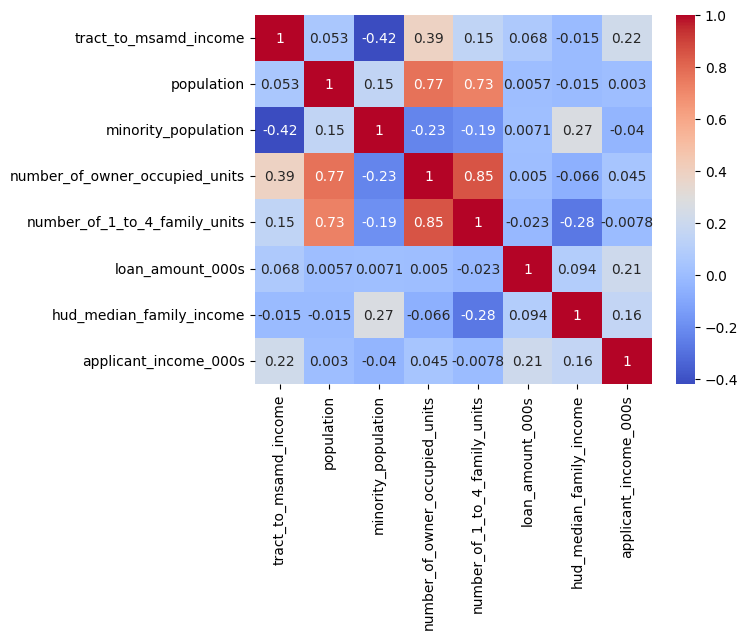

In [39]:
# compute correlation matrix
corr_matrix = data.corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show plot
plt.show()


In [40]:
data.isnull().sum()/len(data) * 100

tract_to_msamd_income             0.073052
population                        0.071993
minority_population               0.071993
number_of_owner_occupied_units    0.073758
number_of_1_to_4_family_units     0.072346
loan_amount_000s                  0.000000
hud_median_family_income          0.071288
applicant_income_000s             8.138792
property_type_name                0.000000
preapproval_name                  0.000000
owner_occupancy_name              0.000000
msamd_name                        8.283838
loan_type_name                    0.000000
loan_purpose_name                 0.000000
lien_status_name                  0.000000
hoepa_status_name                 0.000000
co_applicant_sex_name             0.000000
co_applicant_race_name_1          0.000000
co_applicant_ethnicity_name       0.000000
applicant_sex_name                0.000000
applicant_race_name_1             0.000000
applicant_ethnicity_name          0.000000
agency_name                       0.000000
Region     

In [41]:
data['msamd_name'].value_counts()

Seattle, Bellevue, Everett - WA            118482
Tacoma, Lakewood - WA                       36109
Portland, Vancouver, Hillsboro - OR, WA     23935
Spokane, Spokane Valley - WA                19539
Bremerton, Silverdale - WA                  10892
Kennewick, Richland - WA                    10603
Olympia, Tumwater - WA                      10329
Bellingham - WA                              8106
Yakima - WA                                  5990
Mount Vernon, Anacortes - WA                 4920
Wenatchee - WA                               4211
Longview - WA                                4176
Walla Walla - WA                             1894
Lewiston - ID, WA                             700
Name: msamd_name, dtype: int64

# Visualisation 

Which county has the highest number of loan applications?

In [42]:
loan_counts = data.groupby(['Region', 'loan_status']).size().unstack()

In [43]:
data['loan_status'].value_counts().sum()

283359

In [44]:
county_totals = loan_counts['approved'].sum()

In [45]:
max_county = loan_counts['approved'].idxmax()

In [46]:
max_county

'Western Region'

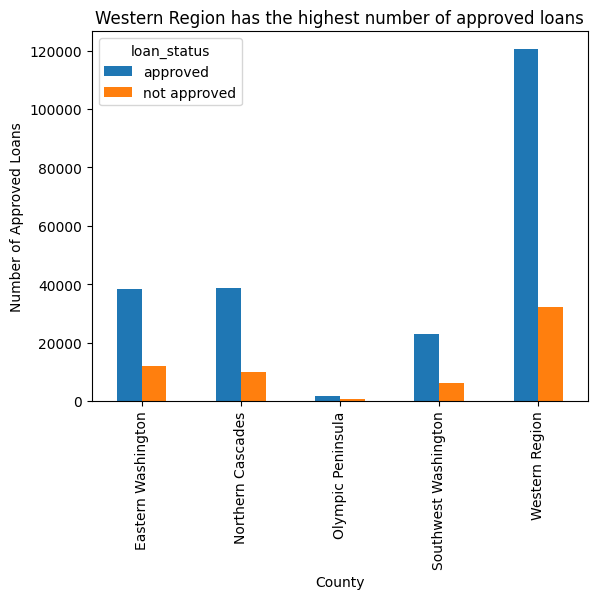

In [47]:
# create a bar chart showing the number of approved loans for each county
loan_counts.plot(kind='bar')

# add labels and title to the chart
plt.xlabel('County')
plt.ylabel('Number of Approved Loans')
plt.title(f'{max_county} has the highest number of approved loans')

# display the chart
plt.show()

In [48]:
county_totals = loan_counts['approved'].sum()/data['loan_status'].value_counts().sum() * 100

In [49]:
county_totals

78.34337360027386

Does your purpose for loan application play a pivotal part?

In [50]:
data['loan_purpose_name']

1            Home purchase
2              Refinancing
4         Home improvement
5              Refinancing
6              Refinancing
                ...       
466560       Home purchase
466561       Home purchase
466562       Home purchase
466564       Home purchase
466565       Home purchase
Name: loan_purpose_name, Length: 283359, dtype: object

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a crosstab of loan purpose and loan approval status
ct = pd.crosstab(data['loan_purpose_name'], data['loan_status'])

In [52]:
ct

loan_status,approved,not approved
loan_purpose_name,,
Home improvement,12022,4808
Home purchase,104813,15051
Refinancing,105190,41475


In [53]:
# calculate the percentage of approved loans for each loan purpose
ct['approved_percent'] = ct['approved'] / (ct['approved'] + ct['not approved']) * 100

In [54]:
ct

loan_status,approved,not approved,approved_percent
loan_purpose_name,,,
Home improvement,12022,4808,71.431967
Home purchase,104813,15051,87.443269
Refinancing,105190,41475,71.721270


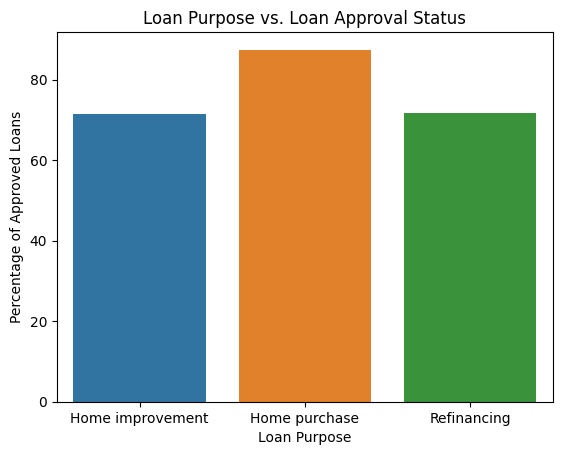

In [55]:
# create a bar chart showing the percentage of approved loans for each loan purpose
sns.barplot(x=ct.index, y='approved_percent', data=ct)
# add labels and title to the chart
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Approved Loans')
plt.title('Loan Purpose vs. Loan Approval Status')

# display the chart
plt.show()

In [56]:
data.shape

(283359, 25)

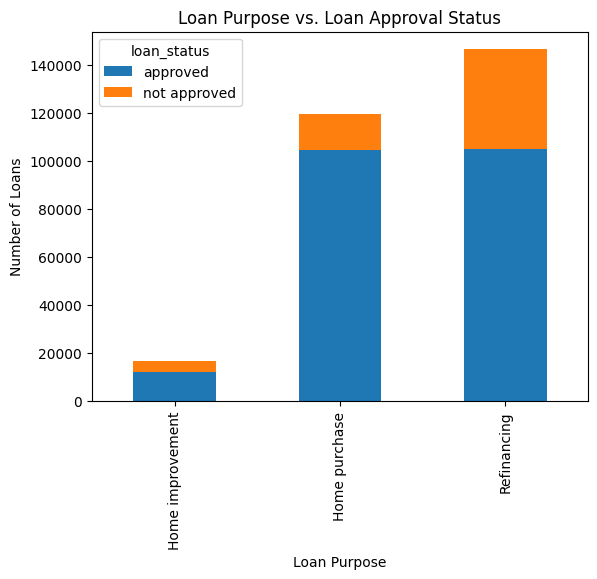

In [57]:
# create a crosstab of loan purpose and loan approval status
ct_lp = pd.crosstab(data['loan_purpose_name'], data['loan_status'])

# create a stacked bar chart showing the relationship between loan purpose and loan approval status
ct_lp.plot(kind='bar', stacked=True)

# add labels and title to the chart
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose vs. Loan Approval Status')

# display the chart
plt.show()

Which types of loans have a better chance of being approved?

In [58]:
data['loan_type_name'].value_counts()

Conventional          208864
FHA-insured            36816
VA-guaranteed          35355
FSA/RHS-guaranteed      2324
Name: loan_type_name, dtype: int64

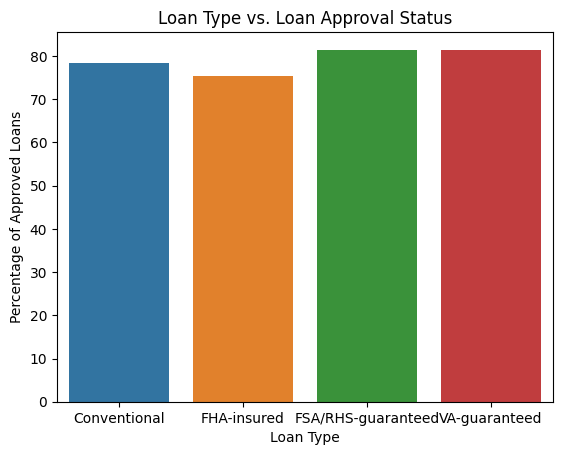

In [59]:
# create a crosstab of loan type and loan approval status
ct_lt = pd.crosstab(data['loan_type_name'],data['loan_status'])

# calculate the percentage of approved loans for each loan type
ct_lt['approved_percent'] = ct_lt['approved'] / (ct_lt['approved'] + ct_lt['not approved']) * 100

# create a bar chart showing the percentage of approved loans for each loan type
sns.barplot(x=ct_lt.index, y='approved_percent', data=ct_lt)

# add labels and title to the chart
plt.xlabel('Loan Type')
plt.ylabel('Percentage of Approved Loans')
plt.title('Loan Type vs. Loan Approval Status')

# display the chart
plt.show()

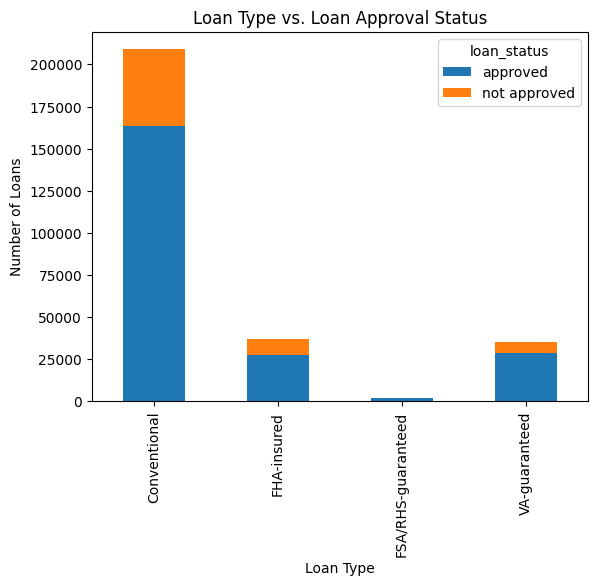

In [60]:
# create a crosstab of loan type and loan approval status
ct_ltp = pd.crosstab(data['loan_type_name'], data['loan_status'])

# create a stacked bar chart showing the relationship between loan type and loan approval status
ct_ltp.plot(kind='bar', stacked=True)

# add labels and title to the chart
plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.title('Loan Type vs. Loan Approval Status')

# display the chart
plt.show()

Applicant Income and Loan Amount

In [61]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

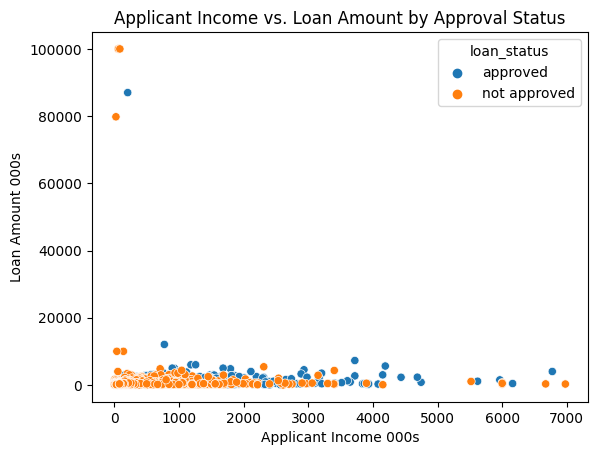

In [62]:
# create a scatter plot of applicant income vs. loan amount, color-coded by approval status
sns.scatterplot(x='applicant_income_000s', y='loan_amount_000s', hue='loan_status', data=data)

# add labels and title to the chart
plt.xlabel('Applicant Income 000s')
plt.ylabel('Loan Amount 000s')
plt.title('Applicant Income vs. Loan Amount by Approval Status')

# display the chart
plt.show()


In [63]:
data['owner_occupancy_name'].value_counts()

Owner-occupied as a principal dwelling        257147
Not owner-occupied as a principal dwelling     24822
Not applicable                                  1390
Name: owner_occupancy_name, dtype: int64

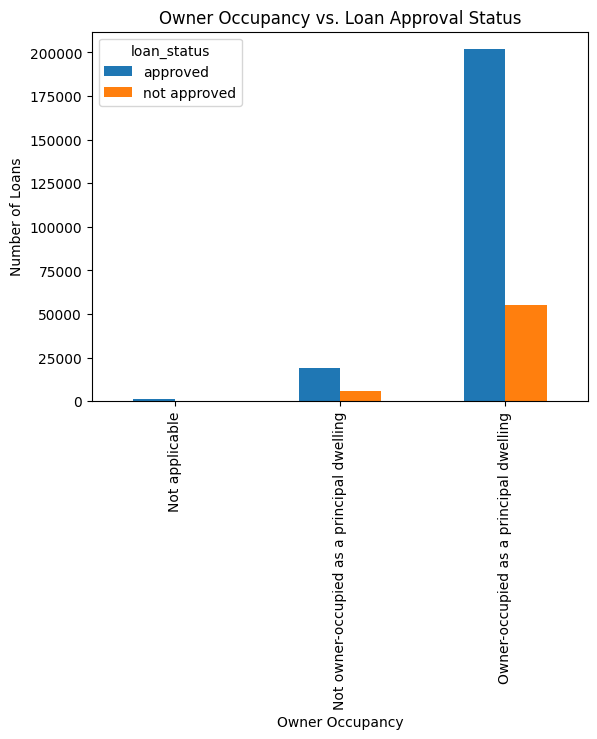

In [64]:
# create a crosstab of owner occupancy and loan approval status
cto = pd.crosstab(data['owner_occupancy_name'], data['loan_status'])

# create a bar chart showing the relationship between owner occupancy and loan approval status
cto.plot(kind='bar', stacked=False)

# add labels and title to the chart
plt.xlabel('Owner Occupancy')
plt.ylabel('Number of Loans')
plt.title('Owner Occupancy vs. Loan Approval Status')

# display the chart
plt.show()

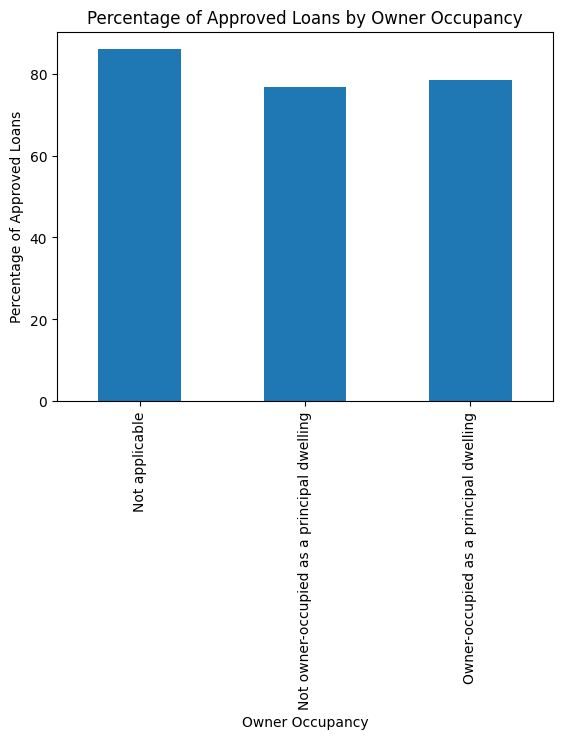

In [65]:
# create a crosstab of owner occupancy and loan approval status
ctoo = pd.crosstab(data['owner_occupancy_name'], data['loan_status'])

# calculate the percentage of approved loans for each owner occupancy category
ctoo['approval_pct'] = ctoo['approved'] / (ctoo['approved'] + ctoo['not approved']) * 100

# create a bar chart showing the percentage of approved loans for each owner occupancy category
ctoo['approval_pct'].plot(kind='bar',stacked = True)

# add labels and title to the chart
plt.xlabel('Owner Occupancy')
plt.ylabel('Percentage of Approved Loans')
plt.title('Percentage of Approved Loans by Owner Occupancy')

# display the chart
plt.show()

In [66]:
data.shape


(283359, 25)

# Make the pipeline. Label encode categorical variables 

In [67]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [69]:
X = data.drop(columns='loan_status')
y = data['loan_status']

In [70]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name           object
agency_name                        object
Region                            

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

num_pipe = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_pipe = OneHotEncoder()
cat_col = ['property_type_name','preapproval_name','owner_occupancy_name','msamd_name',
                   'loan_type_name','loan_purpose_name','lien_status_name','hoepa_status_name',
                   'co_applicant_sex_name','co_applicant_race_name_1','co_applicant_ethnicity_name','applicant_sex_name',
                   'applicant_race_name_1','applicant_ethnicity_name','agency_name','Region']

targ_pipe = OrdinalEncoder(categories=[['not approved', 'approved']])
targ_col = ['loan_status']




preprocessor = make_column_transformer(
    (num_pipe, num_col),
    (cat_pipe, cat_col),
    (targ_pipe, targ_col),
    remainder='passthrough',
    sparse_threshold=0.1
)

preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0.1,
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16dd4d720>),
                                ('onehotencoder', OneHotEncoder(),
                                 ['property_type_name', 'preapproval_name',
                                  'ow...me',
                                  'loan_type_name', 'loan_purpose_name',
                                  'lien_status_name', 'hoepa_status_name',
                                  'co_applicant_sex_name',
                                  'co_applicant_race_name_1',
                                  'co_applicant_ethnicity_name',
                                  'applicant_sex_name', 'applicant_race_name_1',
                                  'applicant_ethnicity_name', 'agency_name',
                                  'Region']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['not approved',
                                                             'approved']]),
                                 ['loan_status'])])

In [72]:
proc_data = pd.DataFrame(preprocessor.fit_transform(data), columns=preprocessor.get_feature_names_out())
proc_data.columns.to_list()

['pipeline__tract_to_msamd_income',
 'pipeline__population',
 'pipeline__minority_population',
 'pipeline__number_of_owner_occupied_units',
 'pipeline__number_of_1_to_4_family_units',
 'pipeline__loan_amount_000s',
 'pipeline__hud_median_family_income',
 'pipeline__applicant_income_000s',
 'onehotencoder__property_type_name_Manufactured housing',
 'onehotencoder__property_type_name_Multifamily dwelling',
 'onehotencoder__property_type_name_One-to-four family dwelling (other than manufactured housing)',
 'onehotencoder__preapproval_name_Not applicable',
 'onehotencoder__preapproval_name_Preapproval was not requested',
 'onehotencoder__preapproval_name_Preapproval was requested',
 'onehotencoder__owner_occupancy_name_Not applicable',
 'onehotencoder__owner_occupancy_name_Not owner-occupied as a principal dwelling',
 'onehotencoder__owner_occupancy_name_Owner-occupied as a principal dwelling',
 'onehotencoder__msamd_name_Bellingham - WA',
 'onehotencoder__msamd_name_Bremerton, Silverdale 

In [73]:
proc_data.shape

(283359, 84)

In [74]:
X = proc_data.drop(columns='ordinalencoder__loan_status')
y = proc_data['ordinalencoder__loan_status']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [76]:
# instantiate the SMOTE function with 'minority' sampling strategy
sm = SMOTE(sampling_strategy='minority')

# apply SMOTE to the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [77]:
X_train_sm.shape

(310578, 83)

In [78]:
y_train_sm.value_counts()

1.0    155289
0.0    155289
Name: ordinalencoder__loan_status, dtype: int64

# Model Building

In [79]:
X = X_train_sm
y = y_train_sm

In [80]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [81]:
model = LogisticRegression(C=1.0, penalty ='l1',solver='liblinear', max_iter=10000)
model.fit(X, y)

LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')

In [82]:
# accuracy = model.score(X_test, y_test)
# print(f'Test accuracy: {accuracy:.3f}')

In [83]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10], 'penalty':['l1'], 'solver': ['lbfgs', 'liblinear']}
# grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# grid_search.fit(X, y)

# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_:.3f}')

In [84]:
train_scores = []
test_scores = []

n_train_samples = int(100 * len(X))
    
# Select a random subset of the training data based on the current n_train_samples
X_subset = X[:n_train_samples]
y_subset = y[:n_train_samples]

# Train the logistic regression model on the subset of training data
model.fit(X_subset, y_subset)

model.predict(X_subset)

array([0., 0., 1., ..., 0., 0., 1.])

In [85]:
train_pred = model.predict(X_subset)

In [86]:
accuracy_score(y_subset, train_pred)

0.6436096568333881

In [87]:
# # Import libraries and load data
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import learning_curve, validation_curve
# import matplotlib.pyplot as plt


# # Plot the learning curve
# train_sizes, train_scores, test_scores = learning_curve(lr, X, y, n_jobs=-1)
# mean_train_scores = np.mean(train_scores, axis=1)
# std_train_scores = np.std(train_scores, axis=1)
# mean_test_scores = np.mean(test_scores, axis=1)
# std_test_scores = np.std(test_scores, axis=1)

# plt.figure()
# plt.title('Learning Curve')
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy')
# plt.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1, color='b')
# plt.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1, color='r')
# plt.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training Score')
# plt.plot(train_sizes, mean_test_scores, 'o-', color='r', label='Validation Score')
# plt.legend(loc='best')

# # Plot the validation curve
# param_range = [0.01, 0.1, 1, 10]
# train_scores, test_scores = validation_curve(lr, X, y, param_name='C', param_range=param_range)


In [88]:
y_test

55950     1.0
120432    1.0
176453    1.0
274469    0.0
242329    0.0
         ... 
235473    0.0
257562    0.0
105329    1.0
90649     1.0
14546     1.0
Name: ordinalencoder__loan_status, Length: 85008, dtype: float64

In [89]:
y_test_filtered = y_test[y_test != 1.0]

In [90]:
X_test[y_test != 1.0]

,pipeline__tract_to_msamd_income,pipeline__population,pipeline__minority_population,pipeline__number_of_owner_occupied_units,pipeline__number_of_1_to_4_family_units,pipeline__loan_amount_000s,pipeline__hud_median_family_income,pipeline__applicant_income_000s,onehotencoder__property_type_name_Manufactured housing,onehotencoder__property_type_name_Multifamily dwelling,...,onehotencoder__agency_name_Federal Deposit Insurance Corporation,onehotencoder__agency_name_Federal Reserve System,onehotencoder__agency_name_National Credit Union Administration,onehotencoder__agency_name_Office of the Comptroller of the Currency,onehotencoder__Region_Eastern Washington,onehotencoder__Region_Northern Cascades,onehotencoder__Region_Olympic Peninsula,onehotencoder__Region_Southwest Washington,onehotencoder__Region_Western Region,onehotencoder__Region_nan
274469,-2.008261,0.500367,2.777469,-0.981056,-0.469066,-0.009534,1.049778,-0.521506,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242329,-0.272712,-1.673667,-1.028736,-1.300206,-1.241797,-0.021739,1.049778,0.095274,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221463,0.146308,0.431998,-0.851148,0.457087,0.438307,-0.002210,1.049778,0.165763,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258163,-0.517425,0.897391,2.006819,-0.805721,-0.183683,-0.103517,-0.335484,-0.609617,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
228801,-0.511956,-1.111717,4.086846,-1.739529,-1.454005,-0.248763,-2.151716,-0.750595,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283295,0.759116,0.323446,-0.759041,0.711225,0.572949,-0.331761,-0.520185,-0.539128,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
265555,-0.455905,0.472780,-0.580128,0.019734,0.435380,-0.110840,-0.335484,-0.186682,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247013,0.918385,-1.372001,-0.902834,-1.075619,-1.133498,0.107640,1.049778,0.465342,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
235473,-0.398828,-0.203720,2.559460,-0.492482,-0.675420,0.080788,1.049778,-0.142627,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
y_pred = model.predict(X_test[y_test != 1.0])

In [92]:
accuracy = accuracy_score(y_test_filtered,y_pred)

In [93]:
accuracy

0.6685091943957968

In [94]:
# Get the coefficients (weights) of the model
coefficients = model.coef_

# Create a dataframe of feature names and their corresponding coefficients
feature_importance = pd.DataFrame(list(zip(X.columns, coefficients[0])), columns=['Feature', 'Coefficient'])

# Sort the features by their absolute coefficient values in descending order
feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_coef', ascending=False)

# Print the top 10 features with the highest absolute coefficient values
print(feature_importance.head(50))


                                              Feature  Coefficient  abs_coef
25  onehotencoder__msamd_name_Seattle, Bellevue, E...     2.826731  2.826731
30              onehotencoder__msamd_name_Yakima - WA    -2.546115  2.546115
42        onehotencoder__hoepa_status_name_HOEPA loan     1.863158  1.863158
31                      onehotencoder__msamd_name_nan    -1.773962  1.773962
6                  pipeline__hud_median_family_income    -1.523075  1.523075
28         onehotencoder__msamd_name_Walla Walla - WA    -1.323490  1.323490
70  onehotencoder__applicant_ethnicity_name_Not ap...     1.098891  1.098891
18  onehotencoder__msamd_name_Bremerton, Silverdal...     1.061376  1.061376
26  onehotencoder__msamd_name_Spokane, Spokane Val...    -0.991304  0.991304
22  onehotencoder__msamd_name_Mount Vernon, Anacor...    -0.951333  0.951333
39  onehotencoder__lien_status_name_Not secured by...    -0.902678  0.902678
21            onehotencoder__msamd_name_Longview - WA    -0.889435  0.889435

In [95]:
feature_importance.head(30)

,Feature,Coefficient,abs_coef
25,"onehotencoder__msamd_name_Seattle, Bellevue, E...",2.826731,2.826731
30,onehotencoder__msamd_name_Yakima - WA,-2.546115,2.546115
42,onehotencoder__hoepa_status_name_HOEPA loan,1.863158,1.863158
31,onehotencoder__msamd_name_nan,-1.773962,1.773962
6,pipeline__hud_median_family_income,-1.523075,1.523075
28,onehotencoder__msamd_name_Walla Walla - WA,-1.323490,1.323490
70,onehotencoder__applicant_ethnicity_name_Not ap...,1.098891,1.098891
18,"onehotencoder__msamd_name_Bremerton, Silverdal...",1.061376,1.061376
26,"onehotencoder__msamd_name_Spokane, Spokane Val...",-0.991304,0.991304
22,"onehotencoder__msamd_name_Mount Vernon, Anacor...",-0.951333,0.951333


In [96]:
X.columns.tolist()

['pipeline__tract_to_msamd_income',
 'pipeline__population',
 'pipeline__minority_population',
 'pipeline__number_of_owner_occupied_units',
 'pipeline__number_of_1_to_4_family_units',
 'pipeline__loan_amount_000s',
 'pipeline__hud_median_family_income',
 'pipeline__applicant_income_000s',
 'onehotencoder__property_type_name_Manufactured housing',
 'onehotencoder__property_type_name_Multifamily dwelling',
 'onehotencoder__property_type_name_One-to-four family dwelling (other than manufactured housing)',
 'onehotencoder__preapproval_name_Not applicable',
 'onehotencoder__preapproval_name_Preapproval was not requested',
 'onehotencoder__preapproval_name_Preapproval was requested',
 'onehotencoder__owner_occupancy_name_Not applicable',
 'onehotencoder__owner_occupancy_name_Not owner-occupied as a principal dwelling',
 'onehotencoder__owner_occupancy_name_Owner-occupied as a principal dwelling',
 'onehotencoder__msamd_name_Bellingham - WA',
 'onehotencoder__msamd_name_Bremerton, Silverdale 